In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
# data = pd.read_stata("./uniswap0826.dta")
# data = data[data["pool_address"]=='0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8']
# temp_data = data.groupby(["week", "sc"]).agg(avg_overall_roi=('overall_roi','mean')).reset_index()

In [ ]:
cols_to_draw = ["mean_fee", "sum_fee", "median_fee"]
action_types=["INCREASE_LIQUIDITY", "DECREASE_LIQUIDITY", "FEE_COLLECTION"]
pool_addrs_4 = [
    '0x4e68ccd3e89f51c3074ca5072bbac773960dfa36',
    '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8',
]
for pool_addr in pool_addrs_4:
    data = pd.read_pickle("../01_create/tx_fee_"+ pool_addr +".pkl")
    for action_type in action_types:
        temp_data = data[data["action"]==action_type].copy()
        sc_cond = (temp_data["sc"]==True)
        data_non_sc = temp_data[~sc_cond].copy().reset_index()
        data_sc = temp_data[sc_cond].copy().reset_index()
        for col_name in cols_to_draw:
            import matplotlib.pyplot as plt
            fig, ax1 = plt.subplots(figsize=(24, 6))
            #col_name = 'mean_fee'
            # Plotting 'daily_fee_avg_winsorized' on the primary Y-axis
            data_sc_and_non_sc = data_sc.merge(data_non_sc, how='left', on='week')
            #ax1.plot(data_non_sc['week'], data_non_sc[col_name], label='Human', color='blue', linestyle='--',)
            #ax1.plot(data_sc['week'], data_sc[col_name], label='SC', color='green', linestyle='--')
            ax1.plot(data_sc_and_non_sc['week'], data_sc_and_non_sc[col_name+"_x"], label='SC', color='green', linestyle='--')
            ax1.plot(data_sc_and_non_sc['week'], data_sc_and_non_sc[col_name+"_y"], label='non-SC', color='blue', linestyle='--')
            
            #ax1.plot(data_false['date'], data_false[col_name], label='Manual', color='orange', linestyle='--')
            #ax1.plot(data_sc['date'], data_sc[col_name], label='SC', color='green', linestyle='--')
            
            #ax1.plot(data_false['date'], data_false[col_name], label='Recommended = False', color='red', linestyle='--', alpha=0.7)
            ax1.set_xlabel('Date')
            ax1.set_ylabel(col_name, color='black')
            ax1.tick_params(axis='y', labelcolor='black')
            ax1.legend(loc='upper left')
            ax1.grid(True)
            plt.title(col_name + 'of action:' + action_type + ' in ' + pool_addr + ' Over Time')
            plt.savefig("/Users/allen/Downloads/graph_fees/" + col_name + '_' + action_type +'_' + pool_addr + ".png")
            plt.close()

In [ ]:
data_sc_and_non_sc

In [ ]:
data_sc.dtypes

In [90]:
one_data_test =  pd.read_pickle("../01_create/daily_alter.pkl")

In [91]:
one_data_test.sort_values(by=['liquidity_provider', 'week'], inplace=True)
one_data_test["tx_fee_cumsum"] = one_data_test.groupby(['liquidity_provider'])['tx_fee'].cumsum()
one_data_test["cum_overall_roi"] = one_data_test.groupby(['liquidity_provider'])['overall_roi'].cumprod()

In [ ]:
one_data_test.columns

In [94]:
one_data_test['tx_fee_cumavg_alternative'] = (
    one_data_test.groupby('liquidity_provider')['tx_fee']
      .shift()
      .groupby(one_data_test['liquidity_provider'])
      .expanding()
      .mean()
      .to_numpy())


one_data_test['tx_fee_cumavg'] = (
    one_data_test.groupby('liquidity_provider')['tx_fee']
      .expanding()
      .mean()
      .to_numpy())

In [ ]:
one_data_test[["liquidity_provider", "week", "tx_fee", "tx_fee_cumavg", "tx_fee_cumavg_alternative"]]


<Axes: xlabel='week', ylabel='cum_overall_roi'>

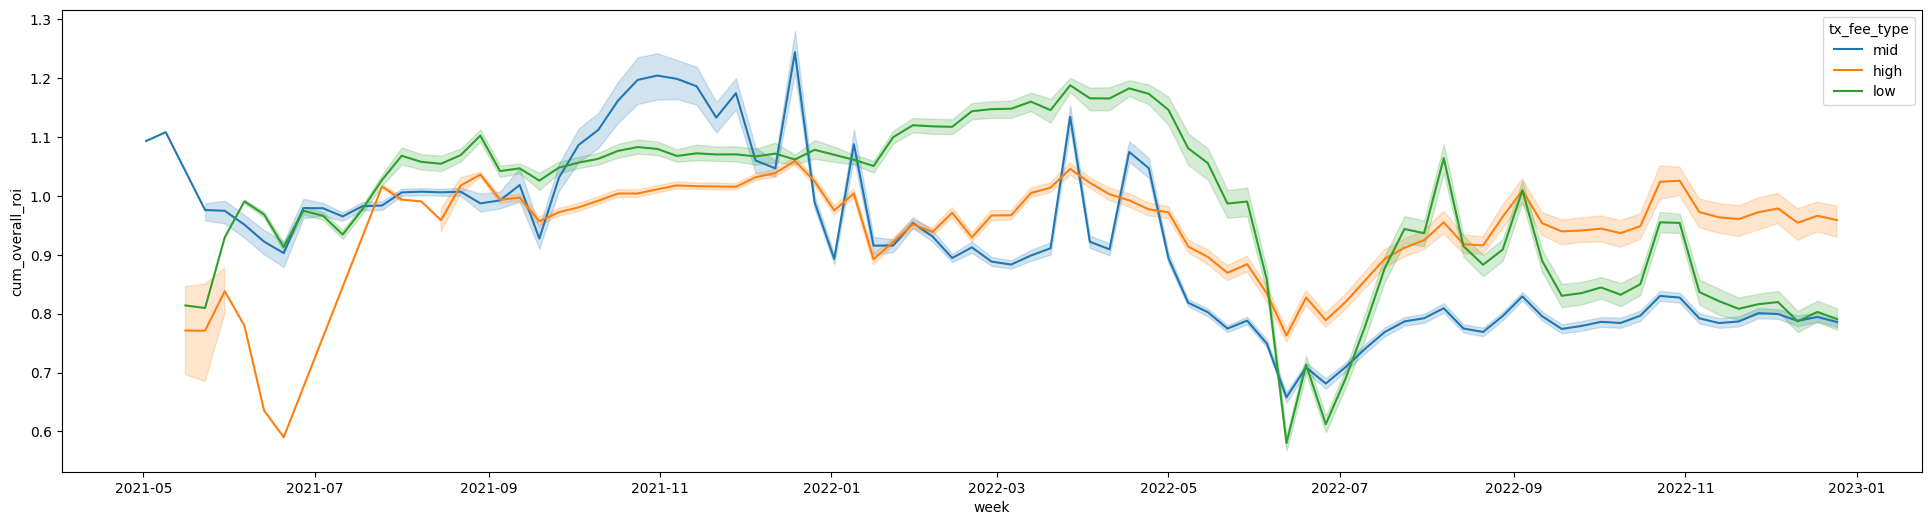

In [125]:
import seaborn as sns
sc_sub_data = one_data_test[one_data_test["sc_x"] > 0].copy()
sc_sub_data = sc_sub_data[~sc_sub_data["tx_fee_cumavg"].isna()].copy()
sc_sub_data_very_low = sc_sub_data["tx_fee_cumavg"] < 0.008498
sc_sub_data_very_high = sc_sub_data["tx_fee_cumavg"] > 0.024639
sc_sub_data["tx_fee_type"] = 'mid'
sc_sub_data.loc[sc_sub_data_very_low, "tx_fee_type"] = 'low'
sc_sub_data.loc[sc_sub_data_very_high, "tx_fee_type"] = 'high'
plt.figure(figsize=(24, 6))
sns.lineplot(data=sc_sub_data, x='week', y='cum_overall_roi', hue="tx_fee_type")

<Axes: >

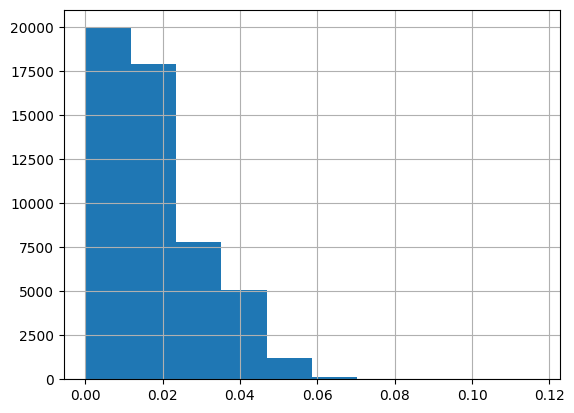

In [121]:
sc_sub_data["tx_fee_cumavg"].hist()

In [122]:
sc_sub_data["tx_fee_cumavg"].describe()

count    52165.000000
mean         0.017951
std          0.012866
min          0.000258
25%          0.008498
50%          0.015237
75%          0.024639
max          0.116789
Name: tx_fee_cumavg, dtype: float64

In [115]:
sc_sub_data["tx_fee_cumavg"].describe()

count    52165.000000
mean         0.017951
std          0.012866
min          0.000258
25%          0.008498
50%          0.015237
75%          0.024639
max          0.116789
Name: tx_fee_cumavg, dtype: float64

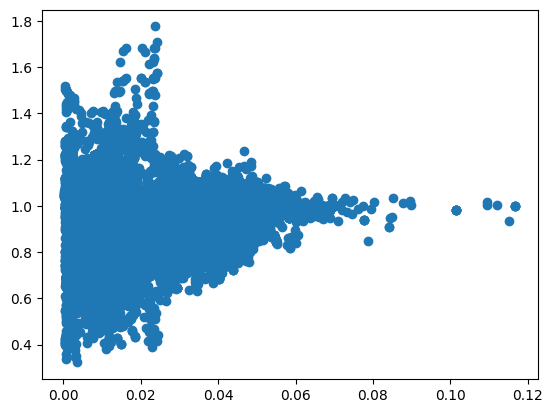

In [127]:
non_sc_sub_data = one_data_test[one_data_test["sc_x"] == 0].copy()
non_sc_sub_data = non_sc_sub_data[~non_sc_sub_data["tx_fee_cumavg"].isna()]
plt.scatter(sc_sub_data['tx_fee_cumavg'], sc_sub_data["cum_overall_roi"])

<Axes: >

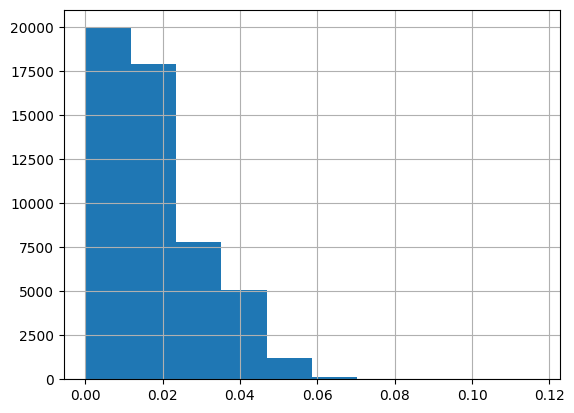

In [103]:
sc_sub_data["tx_fee_cumavg"].hist()

<Axes: >

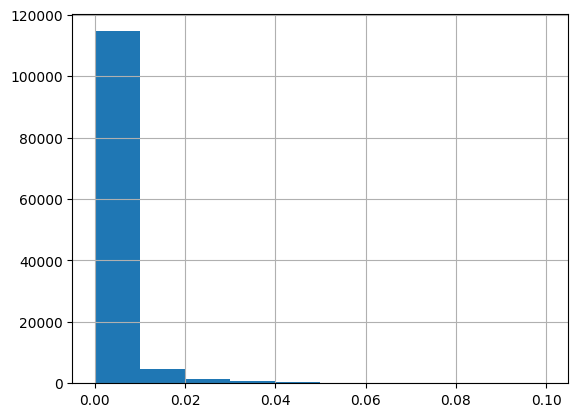

In [109]:
non_sc_sub_data[non_sc_sub_data["tx_fee_cumavg"] < 0.1]["tx_fee_cumavg"].hist()

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 6))
sc_sub_data['tx_fee_cumavg_bins'] = sc_sub_data.groupby('week').tx_fee_cumavg_bins.apply(lambda x: pd.qcut(x, 3).to_string())

ax1.plot(sc_sub_data['week'], sc_sub_data["tx_fee_cumavg"], label='Tx Fee in ETH', color='green', linestyle='--')
ax1.plot(sc_sub_data['week'], sc_sub_data["cum_overall_roi"], label='Cumulative Overall ROI', color='blue', linestyle='--')

#ax1.plot(data_false['date'], data_false[col_name], label='Manual', color='orange', linestyle='--')
#ax1.plot(data_sc['date'], data_sc[col_name], label='SC', color='green', linestyle='--')

#ax1.plot(data_false['date'], data_false[col_name], label='Recommended = False', color='red', linestyle='--', alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Something', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')
ax1.grid(True)
#plt.title(col_name + 'of action:' + action_type + ' in ' + pool_addr + ' Over Time')
plt.show()

In [ ]:
from scipy.stats import pearsonr
pearsonr(sc_sub_data['tx_fee_cumavg'], sc_sub_data["cum_overall_roi"])

In [ ]:
sc_sub_data["high_cumavg"] = 

In [ ]:
non_sc_sub_data = one_data_test[one_data_test["sc_x"] == 0].copy()
plt.scatter(non_sc_sub_data['tx_fee'], non_sc_sub_data["overall_roi"])

In [ ]:
non_sc_sub_data['tx_fee_cumavg'].describe()

In [ ]:
non_sc_sub_data["tx_fee"].describe()